<a href="https://colab.research.google.com/github/azamaufar/supplychainDA/blob/main/EDA_Supply_Chain_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 1: Data Cleaning and Preparation
In this phase, the data will be cleaned and prepared for analysis. The accuracy and completeness of the data will be verified, and the data will be formatted suitably for analysis.
the data is in the format of 2 sheets of excel file with the first sheet about data description listed below and the second are the dataset. I extract the description and write them here, and converted the dataset to csv for faster import. Then I assign the correct datatype to some columns and drop some unused columns aswell.

Import necessary library

In [16]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import datetime as dt
from datetime import datetime
from statistics import mode

from IPython.display import Image

In [17]:
# Import dataset

df=pd.read_csv("/Users/azamaufar/final_project_pacmann/supplychainDA/data/dataset.csv",
               parse_dates=['order date (DateOrders)','shipping date (DateOrders)'],
               )
for categorical_col in ["Category Name", "Shipping Mode",'Department Name', "Order Status",
                        'Customer Segment', "Type", "Delivery Status", "Market"]:
    df[categorical_col] = df[categorical_col].astype(
        "category"
    )
df.drop(['Product Description','Product Image','Order Zipcode', "Customer Password",
         "Customer Fname", "Customer Email"], 
        axis=1,
        inplace=True)
df = df.dropna(axis=1)

In [18]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,False,73,Sporting Goods,Caguas,...,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,False,2018-02-03 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,True,73,Sporting Goods,Caguas,...,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,False,2018-01-18 12:27:00,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,False,73,Sporting Goods,San Jose,...,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,False,2018-01-17 12:06:00,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,False,73,Sporting Goods,Los Angeles,...,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,False,2018-01-16 11:45:00,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,False,73,Sporting Goods,Caguas,...,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,False,2018-01-15 11:24:00,Standard Class


Dataset Description

|FIELDS| DESCRIPTION |
|------|-------------|
|Type|  Type of transaction made |
|Days for shipping (real)|  Actual shipping days of the purchased product|
|Days for shipment (scheduled)|  Days of scheduled delivery of the purchased product|
|Benefit per order|  Earnings per order placed|
|Sales per customer|  Total sales per customer made per customer|
|Delivery Status|  Delivery status of orders: Advance shipping , Late delivery , Shipping canceled , Shipping on time"|
|Late_delivery_risk|  Categorical variable that indicates if sending is late (1), it is not late (0)."|
|Category Id|  Product category code|
|Category Name|  Description of the product category|
|Customer City|  City where the customer made the purchase|
|Customer Country|  Country where the customer made the purchase|
|Customer Email|  Customer's email|
|Customer Fname|  Customer name|
|Customer Id|  Customer ID|
|Customer Lname|  Customer lastname|
|Customer Password|  Masked customer key|
|Customer Segment|  Types of Customers: Consumer , Corporate , Home Office"|
|Customer State|  State to which the store where the purchase is registered belongs|
|Customer Street|  Street to which the store where the purchase is registered belongs|
|Customer Zipcode|  Customer Zipcode|
|Department Id|  Department code of store|
|Department Name|  Department name of store|
|Latitude|  Latitude corresponding to location of store|
|Longitude|  Longitude corresponding to location of store|
|Market|  Market to where the order is delivered : Africa , Europe , LATAM , Pacific Asia , USCA"|
|Order City|  Destination city of the order|
|Order Country|  Destination country of the order|
|Order Customer Id|  Customer order code|
|order date (DateOrders)|  Date on which the order is made|
|Order Id|  Order code|
|Order Item Cardprod Id|  Product code generated through the RFID reader|
|Order Item Discount|  Order item discount value|
|Order Item Discount Rate|  Order item discount percentage|
|Order Item Id|  Order item code|
|Order Item Product Price|  Price of products without discount|
|Order Item Profit Ratio|  Order Item Profit Ratio|
|Order Item Quantity|  Number of products per order|
|Sales|  Value in sales|
|Order Item Total|  Total amount per order|
|Order Profit Per Order|  Order Profit Per Order|
|Order Region|  Region of the world where the order is delivered :  Southeast Asia ,South Asia ,Oceania ,Eastern Asia, West Asia , West of USA , US Center , West Africa, Central Africa ,North Africa ,Western Europe ,Northern , Caribbean , South America ,East Africa ,Southern Europe , East of USA ,Canada ,Southern Africa , Central Asia ,  Europe , Central America, Eastern Europe , South of  USA "|
|Order State|  State of the region where the order is delivered|
|Order Status|  Order Status : COMPLETE , PENDING , CLOSED , PENDING_PAYMENT ,CANCELED , PROCESSING ,SUSPECTED_FRAUD ,ON_HOLD ,PAYMENT_REVIEW"|
|Product Card Id|  Product code|
|Product Category Id|  Product category code|
|Product Description|  Product Description|
|Product Image|  Link of visit and purchase of the product|
|Product Name|  Product Name|
|Product Price|  Product Price|
|Product Status|  Status of the product stock :If it is 1 not available , 0 the product is available "|
|Shipping date (DateOrders)|  Exact date and time of shipment|
|Shipping Mode|  The following shipping modes are presented : Standard Class , First Class , Second Class , Same Day"|


In [19]:
# information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  category      
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  category      
 6   Late_delivery_risk             180519 non-null  bool          
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  category      
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

we will check the Order Country entries

In [20]:
df['Order Country'].unique()

array(['Indonesia', 'India', 'Australia', 'China', 'Japón',
       'Corea del Sur', 'Singapur', 'Turquía', 'Mongolia',
       'Estados Unidos', 'Nigeria', 'República Democrática del Congo',
       'Senegal', 'Marruecos', 'Alemania', 'Francia', 'Países Bajos',
       'Reino Unido', 'Guatemala', 'El Salvador', 'Panamá',
       'República Dominicana', 'Venezuela', 'Colombia', 'Honduras',
       'Brasil', 'México', 'Uruguay', 'Argentina', 'Cuba', 'Perú',
       'Nicaragua', 'Ecuador', 'Angola', 'Sudán', 'Somalia',
       'Costa de Marfil', 'Egipto', 'Italia', 'España', 'Suecia',
       'Austria', 'Canada', 'Madagascar', 'Argelia', 'Liberia', 'Zambia',
       'Níger', 'SudAfrica', 'Mozambique', 'Tanzania', 'Ruanda', 'Israel',
       'Nueva Zelanda', 'Bangladés', 'Tailandia', 'Irak', 'Arabia Saudí',
       'Filipinas', 'Kazajistán', 'Irán', 'Myanmar (Birmania)',
       'Uzbekistán', 'Benín', 'Camerún', 'Kenia', 'Togo', 'Ucrania',
       'Polonia', 'Portugal', 'Rumania', 'Trinidad y Tobago',


We found that Order Country names are in Espanol, and we will translate it to English for better understanding, we're gonna put it into a list and translate it manually and then map it to the Order Country and Customer Country Column values.

In [21]:
countries_esp = ['Indonesia', 'India', 'Australia', 'China', 'Japón',
       'Corea del Sur', 'Singapur', 'Turquía', 'Mongolia',
       'Estados Unidos', 'Nigeria', 'República Democrática del Congo',
       'Senegal', 'Marruecos', 'Alemania', 'Francia', 'Países Bajos',
       'Reino Unido', 'Guatemala', 'El Salvador', 'Panamá',
       'República Dominicana', 'Venezuela', 'Colombia', 'Honduras',
       'Brasil', 'México', 'Uruguay', 'Argentina', 'Cuba', 'Perú',
       'Nicaragua', 'Ecuador', 'Angola', 'Sudán', 'Somalia',
       'Costa de Marfil', 'Egipto', 'Italia', 'España', 'Suecia',
       'Austria', 'Canada', 'Madagascar', 'Argelia', 'Liberia', 'Zambia',
       'Níger', 'SudAfrica', 'Mozambique', 'Tanzania', 'Ruanda', 'Israel',
       'Nueva Zelanda', 'Bangladés', 'Tailandia', 'Irak', 'Arabia Saudí',
       'Filipinas', 'Kazajistán', 'Irán', 'Myanmar (Birmania)',
       'Uzbekistán', 'Benín', 'Camerún', 'Kenia', 'Togo', 'Ucrania',
       'Polonia', 'Portugal', 'Rumania', 'Trinidad y Tobago',
       'Afganistán', 'Pakistán', 'Vietnam', 'Malasia', 'Finlandia',
       'Rusia', 'Irlanda', 'Noruega', 'Eslovaquia', 'Bélgica', 'Bolivia',
       'Chile', 'Jamaica', 'Yemen', 'Ghana', 'Guinea', 'Etiopía',
       'Bulgaria', 'Kirguistán', 'Georgia', 'Nepal',
       'Emiratos Árabes Unidos', 'Camboya', 'Uganda', 'Lesoto',
       'Lituania', 'Suiza', 'Hungría', 'Dinamarca', 'Haití',
       'Bielorrusia', 'Croacia', 'Laos', 'Baréin', 'Macedonia',
       'República Checa', 'Sri Lanka', 'Zimbabue', 'Eritrea',
       'Burkina Faso', 'Costa Rica', 'Libia', 'Barbados', 'Tayikistán',
       'Siria', 'Guadalupe', 'Papúa Nueva Guinea', 'Azerbaiyán',
       'Turkmenistán', 'Paraguay', 'Jordania', 'Hong Kong', 'Martinica',
       'Moldavia', 'Qatar', 'Mali', 'Albania', 'República del Congo',
       'Bosnia y Herzegovina', 'Omán', 'Túnez', 'Sierra Leona', 'Yibuti',
       'Burundi', 'Montenegro', 'Gabón', 'Sudán del Sur', 'Luxemburgo',
       'Namibia', 'Mauritania', 'Grecia', 'Suazilandia', 'Guyana',
       'Guayana Francesa', 'República Centroafricana', 'Taiwán',
       'Estonia', 'Líbano', 'Chipre', 'Guinea-Bissau', 'Surinam',
       'Belice', 'Eslovenia', 'República de Gambia', 'Botsuana',
       'Armenia', 'Guinea Ecuatorial', 'Kuwait', 'Bután', 'Chad',
       'Serbia', 'Sáhara Occidental']

In [22]:
countries_en = ['Indonesia', 'India', 'Australia', 'China', 'Japan',
       'South Korea', 'Singapore', 'Turkey', 'Mongolia',
       'United States', 'Nigeria', 'Democratic Republic of the Congo',
       'Senegal', 'Morocco', 'Germany', 'France', 'Netherlands',
       'United Kingdom', 'Guatemala', 'El Salvador', 'Panama',
       'Dominican Republic', 'Venezuela', 'Colombia', 'Honduras',
       'Brazil', 'Mexico', 'Uruguay', 'Argentina', 'Cuba', 'Peru',
       'Nicaragua', 'Ecuador', 'Angola', 'Sudan', 'Somalia',
       'Ivory Coast', 'Egypt', 'Italy', 'Spain', 'Sweden',
       'Austria', 'Canada', 'Madagascar', 'Algeria', 'Liberia', 'Zambia',
       'Niger', 'South Africa', 'Mozambique', 'Tanzania', 'Rwanda', 'Israel',
       'New Zealand', 'Bangladesh', 'Thailand', 'Iraq', 'Saudi Arabia',
       'Philippines', 'Kazakhstan', 'Iran', 'Myanmar (Burma)',
       'Uzbekistan', 'Benin', 'Cameroon', 'Kenya', 'Togo', 'Ukraine',
       'Poland', 'Portugal', 'Romania', 'Trinidad and Tobago',
       'Afghanistan', 'Pakistan', 'Vietnam', 'Malaysia', 'Finland',
       'Russia', 'Ireland', 'Norway', 'Slovakia', 'Belgium', 'Bolivia',
       'Chile', 'Jamaica', 'Yemen', 'Ghana', 'Guinea', 'Ethiopia',
       'Bulgaria', 'Kyrgyzstan', 'Georgia', 'Nepal',
       'United Arab Emirates', 'Cambodia', 'Uganda', 'Lesotho',
       'Lithuania', 'Switzerland', 'Hungary', 'Denmark', 'Haiti',
       'Belarus', 'Croatia', 'Laos', 'Bahrain', 'Macedonia',
       'Czech Republic', 'Sri Lanka', 'Zimbabwe', 'Eritrea',
       'Burkina Faso', 'Costa Rica', 'Libya', 'Barbados', 'Tajikistan',
       'Syria', 'Guadeloupe', 'Papua New Guinea', 'Azerbaijan',
       'Turkmenistan', 'Paraguay', 'Jordan', 'Hong Kong', 'Martinique',
       'Moldova', 'Qatar', 'Mali', 'Albania', 'Republic of the Congo',
       'Bosnia and Herzegovina', 'Oman', 'Tunisia', 'Sierra Leone', 'Djibouti',
       'Burundi', 'Montenegro', 'Gabon', 'South Sudan', 'Luxembourg',
       'Namibia', 'Mauritania', 'Greece', 'Swaziland', 'Guyana',
       'French Guiana', 'Central African Republic', 'Taiwan',
       'Estonia', 'Lebanon', 'Cyprus', 'Guinea-Bissau', 'Suriname',
       'Belize', 'Slovenia', 'Republic of The Gambia', 'Botswana',
       'Armenia', 'Equatorial Guinea', 'Kuwait', 'Bhutan', 'Chad',
       'Serbia', 'Western Sahara']

In [23]:
countries_dict = {}
for i in range(len(countries_esp)):
    countries_dict[countries_esp[i]] = countries_en[i]

print(countries_dict)

{'Indonesia': 'Indonesia', 'India': 'India', 'Australia': 'Australia', 'China': 'China', 'Japón': 'Japan', 'Corea del Sur': 'South Korea', 'Singapur': 'Singapore', 'Turquía': 'Turkey', 'Mongolia': 'Mongolia', 'Estados Unidos': 'United States', 'Nigeria': 'Nigeria', 'República Democrática del Congo': 'Democratic Republic of the Congo', 'Senegal': 'Senegal', 'Marruecos': 'Morocco', 'Alemania': 'Germany', 'Francia': 'France', 'Países Bajos': 'Netherlands', 'Reino Unido': 'United Kingdom', 'Guatemala': 'Guatemala', 'El Salvador': 'El Salvador', 'Panamá': 'Panama', 'República Dominicana': 'Dominican Republic', 'Venezuela': 'Venezuela', 'Colombia': 'Colombia', 'Honduras': 'Honduras', 'Brasil': 'Brazil', 'México': 'Mexico', 'Uruguay': 'Uruguay', 'Argentina': 'Argentina', 'Cuba': 'Cuba', 'Perú': 'Peru', 'Nicaragua': 'Nicaragua', 'Ecuador': 'Ecuador', 'Angola': 'Angola', 'Sudán': 'Sudan', 'Somalia': 'Somalia', 'Costa de Marfil': 'Ivory Coast', 'Egipto': 'Egypt', 'Italia': 'Italy', 'España': 'Sp

In [24]:
df['Order Country'] = df['Order Country'].map(countries_dict)

In [25]:
df['Customer Country'] = df['Customer Country'].map(countries_dict)

## Explore Dataset

In this notebook portfolio, I will be analyzing the order status of our e-commerce business. We have various order statuses that our orders can fall under, including COMPLETE, PENDING, CLOSED, PENDING_PAYMENT, CANCELED, PROCESSING, SUSPECTED_FRAUD, ON_HOLD, and PAYMENT_REVIEW.

Through data exploration and visualization, I aim to understand the distribution of these order statuses and identify any trends or patterns that may exist. This analysis will help us identify areas where we can improve our order processing and delivery, leading to higher customer satisfaction and better business outcomes.

Now I will begin to explore the pattern in the dataset, started with the Order Status,
there are 9 types of Order Status and these are the count of each order status, description of each order status are listed below:

-  COMPLETE: The order has been processed successfully and delivered to the customer.

-  PENDING: The order is waiting to be processed.

-  CLOSED: The order has been closed, which usually means that it has been returned, cancelled or completed and no further action is required.

-  PENDING_PAYMENT: The order is waiting for payment to be processed.

-  CANCELED: The order has been cancelled and will not be processed further.

-  PROCESSING: The order is being processed and prepared for shipment.

-  SUSPECTED_FRAUD: The order is suspected to be fraudulent and requires further verification.

-  ON_HOLD: The order has been placed on hold and is not currently being processed.

-  PAYMENT_REVIEW: The order is under review for payment verification.

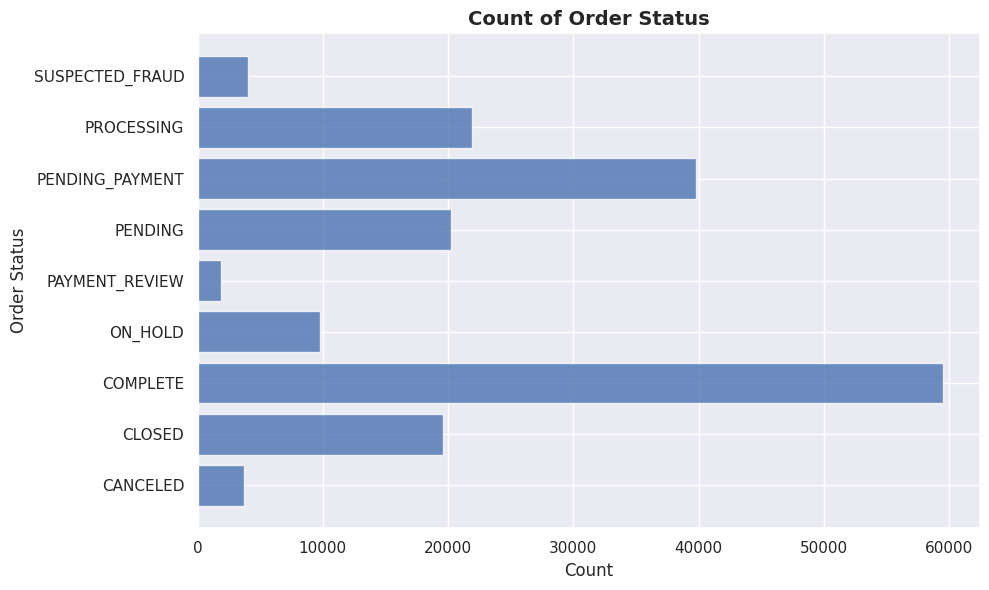

In [11]:
#Percentage of Order Status
orderstatus_counts = df.groupby('Order Status')['Customer Id'].count()

# set figure size
plt.figure(figsize=(10,6))

# plot a horizontal bar chart
plt.barh(orderstatus_counts.index, orderstatus_counts, alpha=0.8)
plt.style.use('ggplot')
plt.title('Count of Order Status', fontsize=14, fontweight='bold', loc='center')
plt.xlabel('Count')
plt.ylabel('Order Status')
plt.tight_layout()
plt.savefig('./output/Count of Order Status.png', format='png', dpi=300)
plt.show()


After analyzing the order status distribution using a bar chart, it was found that there are still a significant number of orders that are still in the "Processing" status. However, upon further investigation, it was discovered that the order date and shipping date were the same, which means that it is not entirely clear whether the order is being processed or not. As a result, additional data is needed to determine the actual processing status of these orders.

In [12]:
# Create a mask to filter for orders that are still processing or pending
mask = ((df['Order Status'] == 'PROCESSING') | (df['Order Status'] == 'PENDING'))

# Filter the dataset for orders that match the mask and where the shipping date has passed
late_orders = df.loc[(mask) & (df['shipping date (DateOrders)'] < datetime.now()), :]

# Print out the late orders
late_orders

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,True,73,Sporting Goods,Caguas,...,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.750000,False,2018-01-18 12:27:00,Standard Class
7,TRANSFER,2,1,68.430000,285.140015,Late delivery,True,73,Sporting Goods,Miami,...,Eastern Asia,Guangdong,PROCESSING,1360,73,Smart watch,327.750000,False,2018-01-15 10:21:00,First Class
11,TRANSFER,5,2,45.689999,268.760010,Late delivery,True,73,Sporting Goods,Freeport,...,Southeast Asia,Célebes Septentrional,PENDING,1360,73,Smart watch,327.750000,False,2018-01-18 08:57:00,Second Class
12,TRANSFER,4,2,21.760000,262.200012,Late delivery,True,73,Sporting Goods,Salinas,...,Southeast Asia,Célebes Septentrional,PENDING,1360,73,Smart watch,327.750000,False,2018-01-17 08:36:00,Second Class
14,TRANSFER,2,1,16.389999,327.750000,Late delivery,True,73,Sporting Goods,Peabody,...,South Asia,Maharashtra,PROCESSING,1360,73,Smart watch,327.750000,False,2018-01-15 07:54:00,First Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180482,TRANSFER,5,4,129.789993,383.980011,Late delivery,True,45,Fishing,Modesto,...,South Asia,Maharashtra,PROCESSING,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,False,2016-01-22 20:18:00,Standard Class
180485,TRANSFER,4,4,11.160000,371.980011,Shipping on time,False,45,Fishing,San Pablo,...,Eastern Asia,Xinjiang Uygur,PENDING,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,False,2016-01-21 14:42:00,Standard Class
180487,TRANSFER,3,4,27.000000,359.980011,Advance shipping,False,45,Fishing,Rowland Heights,...,South Asia,Telangana,PROCESSING,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,False,2016-01-20 12:36:00,Standard Class
180491,TRANSFER,3,4,33.599998,335.980011,Advance shipping,False,45,Fishing,Caguas,...,Oceania,Victoria,PENDING,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,False,2016-01-20 05:35:00,Standard Class


After encountering some discrepancies in the order delivery status, I decided to focus only on orders that have a status of "COMPLETE" for the next analysis. This would exclude orders that are still being processed or pending, and hopefully provide a more accurate picture of the delivery performance. I filtered the dataset accordingly and proceeded with the analysis using the complete orders only.

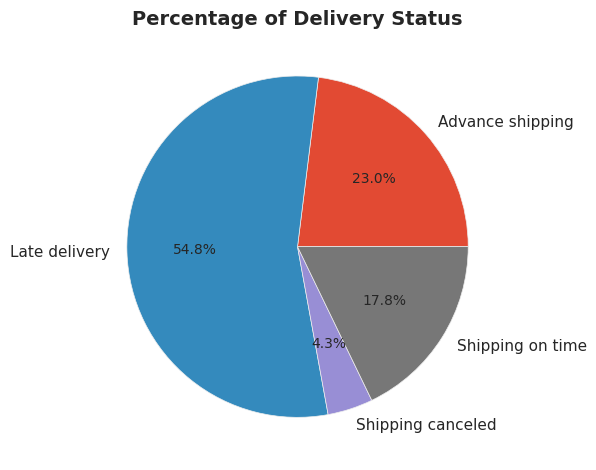

In [13]:
#Percentage of Delivery Status

delivery_counts = df.groupby('Delivery Status')['Customer Id'].count()

# plot a pie chart
plt.pie(delivery_counts, labels=delivery_counts.index, autopct='%1.1f%%')
plt.style.use('ggplot')
plt.title('Percentage of Delivery Status', fontsize=14, fontweight='bold', loc='center')
plt.tight_layout()
plt.savefig('./output/Percentage of Delivery Status.png', format='png', dpi=300)
plt.show()


For the next analysis, I filtered the dataset to only include orders that have a status of "COMPLETE". This is because I want to focus on orders that have already been processed and delivered to the customer. By filtering out orders with other statuses such as "PROCESSING", "PENDING", or "CANCELED", I can ensure that I am only analyzing data from orders that have already been completed. This will allow me to get a better understanding of the factors that contribute to successful and timely deliveries.

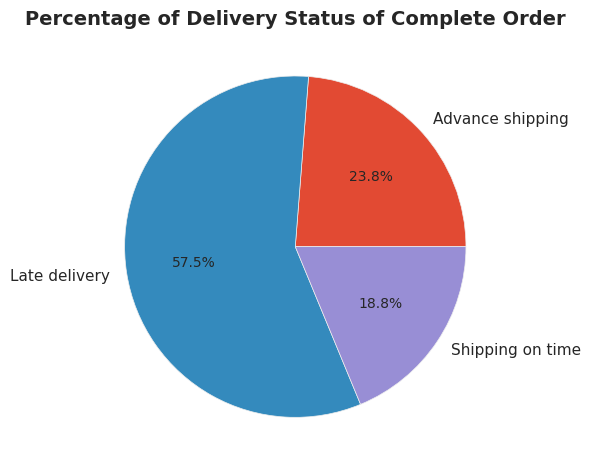

In [14]:
#Percentage of Delivery Status of Complete Order
df_complete_order = df.loc[df['Order Status']=='COMPLETE']
delivery_counts = df_complete_order.groupby('Delivery Status')['Customer Id'].count()

# Remove the "Shipping Canceled" label
delivery_counts.drop('Shipping canceled', inplace=True)

# plot a pie chart
plt.pie(delivery_counts, labels=delivery_counts.index, autopct='%1.1f%%')
plt.style.use('ggplot')
plt.title('Percentage of Delivery Status of Complete Order', fontsize=14, fontweight='bold', loc='center')
plt.tight_layout()
plt.savefig('./output/Percentage of Delivery Status of Complete Order.png', format='png', dpi=300)
plt.show()


In [15]:
df_complete_order_and_late = df.loc[(df['Order Status']=='COMPLETE') & (df['Delivery Status']=='Late delivery')]

After filtering the dataset for complete orders and late deliveries, I wanted to see the percentage of regions with late delivery. To achieve this, I first calculated the total number of orders for each region using the groupby() function. Then, I calculated the number of orders with late delivery for each region using the same function.

Next, I calculated the percentage of orders with late delivery for each region by dividing the number of late deliveries by the total number of orders and multiplying by 100.

To visualize this data, I created a horizontal bar chart using plt.barh() function. The chart shows the total number of orders for each region as well as the number of orders with late delivery. The text labels on each bar show the percentage of late deliveries for each region. The resulting chart helps me identify which regions have the highest percentage of late deliveries.

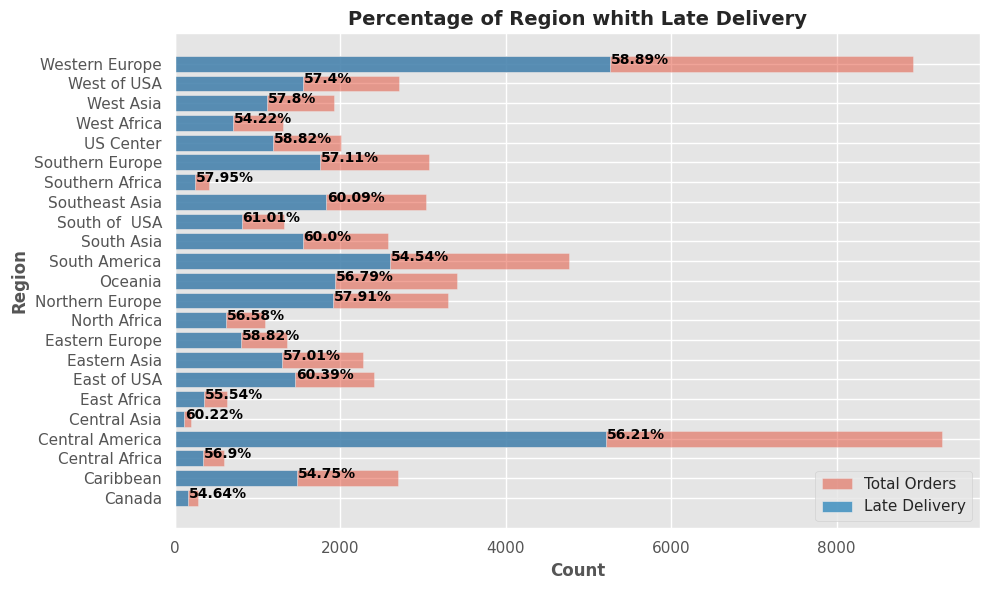

In [16]:
#Counts of Region of complete order
total_complete_counts = df_complete_order.groupby('Order Region')['Customer Id'].count()

#Counts of Region whith late delivery
region_counts = df_complete_order_and_late.groupby('Order Region')['Customer Id'].count()

late_delivery_pct = region_counts / total_complete_counts * 100


# set figure size
plt.figure(figsize=(10,6))

# plot a horizontal bar chart
plt.barh(total_complete_counts.index, total_complete_counts, alpha=0.5, label='Total Orders')
plt.barh(region_counts.index, region_counts, alpha=0.8, label='Late Delivery')
plt.style.use('ggplot')
plt.title('Percentage of Region whith Late Delivery', fontsize=14, fontweight='bold', loc='center')
plt.xlabel('Count',fontweight='bold')
plt.ylabel('Region',fontweight='bold')

#add legend
plt.legend()

# add text labels for each bar
for i, v in enumerate(region_counts):
    plt.text(v + 10, i, str(round(late_delivery_pct[i], 2)) + '%', color='black', fontweight='bold')

plt.tight_layout()
plt.savefig('./output/Percentage of Region whith Late Delivery.png', format='png', dpi=300)
plt.show()


Looking at the horizontal bar chart titled "Percentage of Region whith Late Delivery", it is clear that the percentage of late orders is still higher than the percentage of orders that were shipped on time or even shipped in advance for all regions. The chart displays the counts of total orders and late deliveries for each region. The length of each bar represents the total number of orders, while the orange section of the bar represents the number of late deliveries. Additionally, the chart displays the percentage of late deliveries for each region as text labels on the bars. This information indicates that there is still room for improvement in terms of order delivery for all regions.

I wanted to see if the high percentage of late deliveries was consistent across all markets, so I created a chart showing the Percentage of Market with Late Delivery. This chart aggregates the number of orders and the number of late deliveries by market and calculates the percentage of late deliveries for each market.

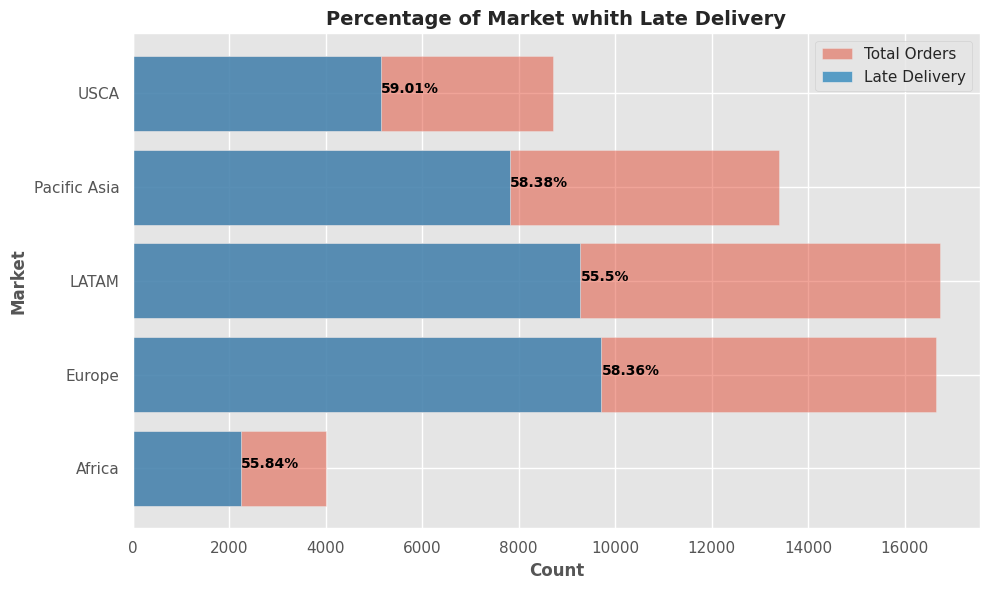

In [17]:
#Counts of Region of complete order
total_complete_counts_market = df_complete_order.groupby('Market')['Customer Id'].count()

#Counts of Region whith late delivery
market_counts = df_complete_order_and_late.groupby('Market')['Customer Id'].count()

market_late_delivery_pct = market_counts / total_complete_counts_market * 100


# set figure size
plt.figure(figsize=(10,6))

# plot a horizontal bar chart
plt.barh(total_complete_counts_market.index, total_complete_counts_market, alpha=0.5, label='Total Orders')
plt.barh(market_counts.index, market_counts, alpha=0.8, label='Late Delivery')
plt.style.use('ggplot')
plt.title('Percentage of Market whith Late Delivery', fontsize=14, fontweight='bold', loc='center')
plt.xlabel('Count',fontweight='bold')
plt.ylabel('Market',fontweight='bold')

#add legend
plt.legend()

# add text labels for each bar
for i, v in enumerate(market_counts):
    plt.text(v + 10, i, str(round(market_late_delivery_pct[i], 2)) + '%', color='black', fontweight='bold')

plt.tight_layout()
plt.savefig('./output/Percentage of Market with Late Delivery.png', format='png', dpi=300)
plt.show()


The chart shows that for all markets, the percentage of late orders is still higher than the percentage of orders that were shipped on time or even in advance. This suggests that the problem is not isolated to a particular region or market, but rather a more systemic issue.

In [18]:
#Average difference between real and scheduled days for shipping for late delivery
df_complete_order_and_late_copy = df_complete_order_and_late.copy()
df_complete_order_and_late_copy.loc[:, 'days diff'] = (df_complete_order_and_late_copy.loc[:,'Days for shipping (real)'] - df_complete_order_and_late_copy.loc[:,'Days for shipment (scheduled)'])

mean_diff = df_complete_order_and_late_copy['days diff'].mean()

print(f"The average difference between real and scheduled days for shipping is: {mean_diff:.2f}")

The average difference between real and scheduled days for shipping is: 1.60


I noticed that the late delivery issue seems to be present in all regions, so I decided to analyze the data by other factors. I wanted to see if there is a particular product category that is causing the delay in delivery.

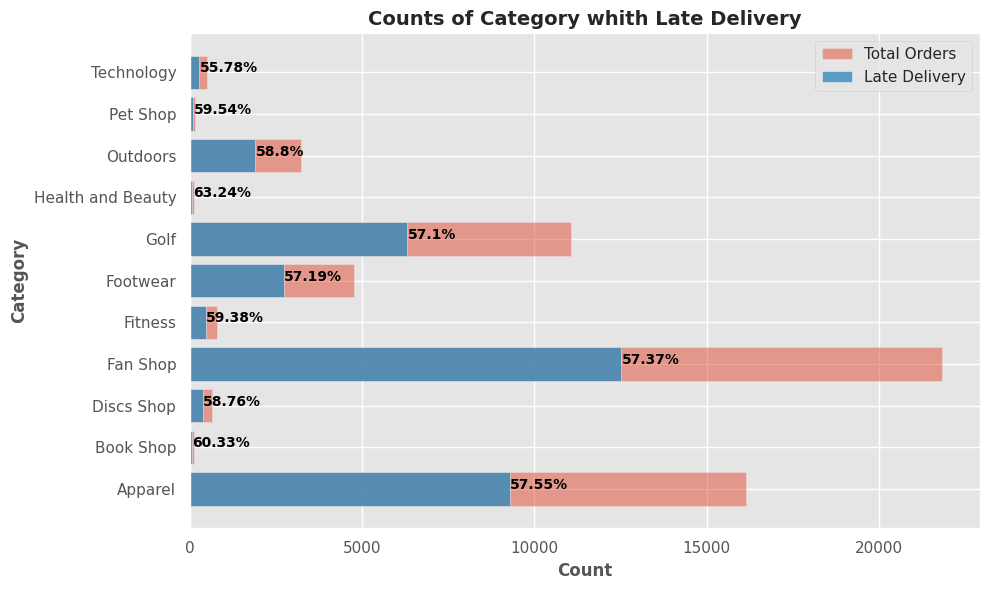

In [19]:
#Counts of Category Name of complete order
category_complete_counts = df_complete_order.groupby('Department Name')['Customer Id'].count()

#Counts of Category Name whith late delivery
category_counts = df_complete_order_and_late.groupby('Department Name')['Customer Id'].count()

category_late_delivery_pct = category_counts / category_complete_counts * 100


# set figure size
plt.figure(figsize=(10,6))

# plot a horizontal bar chart
plt.barh(category_complete_counts.index, category_complete_counts, alpha=0.5, label='Total Orders')
plt.barh(category_counts.index, category_counts, alpha=0.8, label='Late Delivery')
plt.style.use('ggplot')
plt.title('Counts of Category whith Late Delivery', fontsize=14, fontweight='bold', loc='center')
plt.xlabel('Count',fontweight='bold')
plt.ylabel('Category',fontweight='bold')

#add legend
plt.legend()

# add text labels for each bar
for i, v in enumerate(category_counts):
    plt.text(v + 10, i, str(round(category_late_delivery_pct[i], 2)) + '%', color='black', fontweight='bold')

plt.tight_layout()
plt.savefig('./output/Counts of Category with Late Delivery.png', format='png', dpi=300)
plt.show()


The horizontal bar chart shows the counts of each category name for complete orders and late deliveries. However, the result is still consistent with the previous analysis that late delivery dominates the delivery status for all categories, indicating a potential issue with the delivery system or logistics.

To determine the root cause of the high late delivery rate for all regions and categories, I may need to further analyze the data and identify patterns or trends. 

First, I will analyze the inventory to investigate whether inventory levels are contributing to late deliveries. I will look for products that are frequently out of stock or in short supply, leading to delays in fulfilling orders. 

Next, I will review the order fulfillment process to see if there are any bottlenecks or inefficiencies that could be causing delays. I will investigate whether any particular stages of the process are taking longer than they should. 
    
Finally, I will examine the shipping modes and carriers to determine if shipping carrier performance is contributing to the late deliveries. I will look at which carriers are responsible for the most late deliveries and investigate why this might be happening. I will also explore if there are specific routes or regions where certain carriers struggle. By diving deeper into the data and identifying potential areas of improvement, I may be able to implement changes that will help reduce the late delivery rate and improve customer satisfaction.

Analyzing the inventory is an important step in identifying potential issues that could be causing delays in order fulfillment. One way to approach this is to investigate whether inventory levels are contributing to late deliveries. By looking at the Product Status column, which indicates whether a product is available or not, we can get a sense of how frequently certain products are out of stock or in short supply. If certain products are consistently out of stock, it could lead to delays in fulfilling orders, resulting in dissatisfied customers and potentially negative impact on the bottom line. Therefore, identifying products with high frequency of unavailability can help to optimize the inventory management and improve order fulfillment processes.

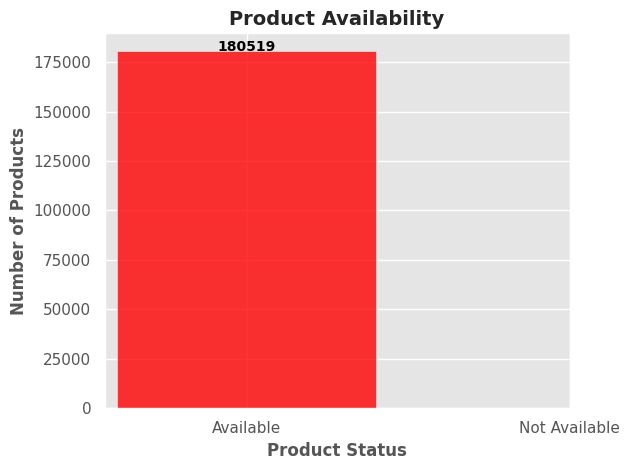

In [20]:
# group the data by product status and count the number of products
product_status_counts = df['Product Status'].value_counts()

# create a bar chart
plt.bar(product_status_counts.index, product_status_counts.values, color=['red', 'green'], alpha=0.8)

# add labels and title
plt.title('Product Availability', fontsize=14, fontweight='bold', loc='center')
plt.xlabel('Product Status', fontweight='bold')
plt.ylabel('Number of Products', fontweight='bold')
plt.xticks([0, 1], ['Available', 'Not Available'])

# add text labels for each bar
for i, v in enumerate(product_status_counts.values):
    plt.text(i, v+50, str(v), color='black', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


If all the orders are available, it means that there are no stock shortages that could be contributing to late deliveries. However, it's still possible that other factors such as production delays or delivery issues are causing delays. Therefore, further investigation into the order fulfillment process is still necessary to identify any bottlenecks or inefficiencies that could be causing delays.

In order to ensure timely delivery of orders, it is important to review the entire order fulfillment process. This involves analyzing the time taken to fulfill an order, from the moment it is placed until it is delivered to the customer. By reviewing the process, we can identify any bottlenecks or inefficiencies that may be causing delays and take appropriate action to rectify the situation.

The first step in this analysis is to compare the order date and shipping date for each order. If there is a significant delay between these dates, it suggests that there may be delays at some point in the fulfillment process. We can then investigate each stage of the process to identify where the delay is occurring.

/tmp/ipykernel_277/2755295449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete_order['Processing Time'] = (df_complete_order['shipping date (DateOrders)'] - df_complete_order['order date (DateOrders)']).dt.days


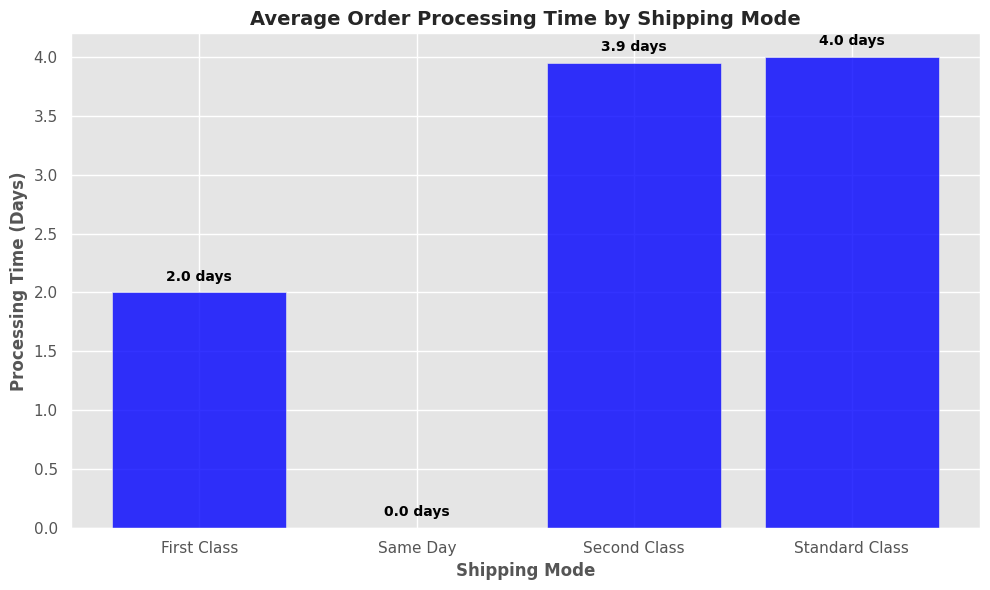

In [21]:
# calculate the order processing time in days
df_complete_order['Processing Time'] = (df_complete_order['shipping date (DateOrders)'] - df_complete_order['order date (DateOrders)']).dt.days

# calculate the average processing time by shipping mode
avg_processing_time_by_mode = df_complete_order.groupby('Shipping Mode')['Processing Time'].mean()

# create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_processing_time_by_mode.index, avg_processing_time_by_mode.values, color='blue', alpha=0.8)

# add labels and title
plt.title('Average Order Processing Time by Shipping Mode', fontsize=14, fontweight='bold', loc='center')
plt.xlabel('Shipping Mode', fontweight='bold')
plt.ylabel('Processing Time (Days)', fontweight='bold')

# add day labels for each bar
for i, v in enumerate(avg_processing_time_by_mode.values):
    plt.text(i, v + 0.1, '{:.1f} days'.format(v), color='black', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


/tmp/ipykernel_277/3178827863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete_order['Delivery Date'] = df_complete_order['shipping date (DateOrders)'] + pd.to_timedelta(df_complete_order['Days for shipping (real)'], unit='d')
/tmp/ipykernel_277/3178827863.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipping_data['Real Shipping Time'] = (shipping_data['Delivery Date'] - shipping_data['shipping date (DateOrders)']).dt.days


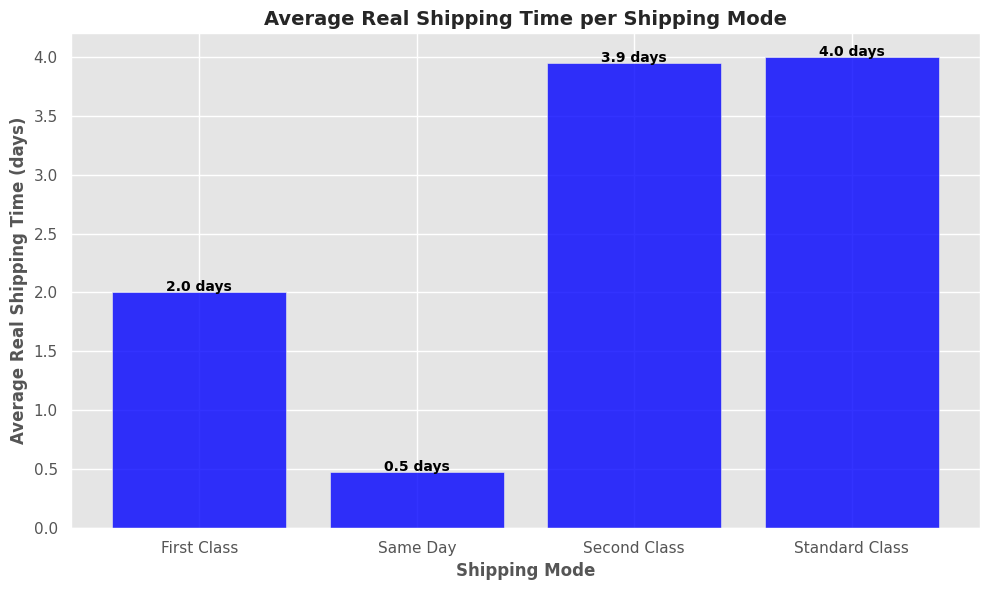

In [22]:
# create a subset of the data with only the necessary columns
df_complete_order['Delivery Date'] = df_complete_order['shipping date (DateOrders)'] + pd.to_timedelta(df_complete_order['Days for shipping (real)'], unit='d')

shipping_data = df_complete_order[['Order Id', 'Shipping Mode', 'order date (DateOrders)', 'shipping date (DateOrders)', 'Delivery Date']]

# calculate the real shipping time
shipping_data['Real Shipping Time'] = (shipping_data['Delivery Date'] - shipping_data['shipping date (DateOrders)']).dt.days

# group the data by shipping mode and calculate the average real shipping time
avg_shipping_time = shipping_data.groupby('Shipping Mode')['Real Shipping Time'].mean()

# create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_shipping_time.index, avg_shipping_time.values, color='blue', alpha=0.8)

# add labels and title
plt.title('Average Real Shipping Time per Shipping Mode', fontsize=14, fontweight='bold', loc='center')
plt.xlabel('Shipping Mode', fontweight='bold')
plt.ylabel('Average Real Shipping Time (days)', fontweight='bold')

# add time labels for each bar
for i, v in enumerate(avg_shipping_time.values):
    plt.text(i, v+0.01, '{:.1f} days'.format(v), color='black', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


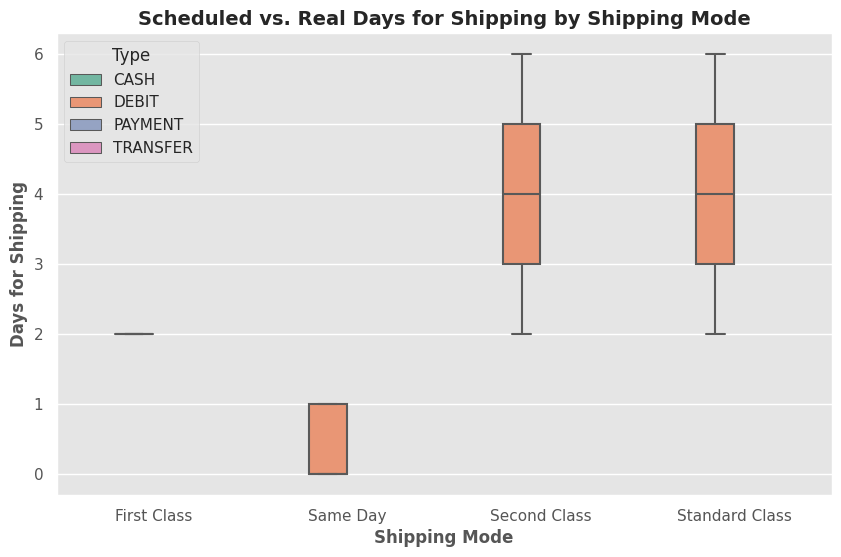

In [23]:
# filter out any rows with missing values for scheduled days for shipping or real days for shipping
df_shipping = df_complete_order.dropna(subset=['Days for shipment (scheduled)', 'Days for shipping (real)'])

# create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Shipping Mode', y='Days for shipping (real)', data=df_shipping, hue='Type', palette='Set2')

# add labels and title
plt.title('Scheduled vs. Real Days for Shipping by Shipping Mode', fontsize=14, fontweight='bold', loc='center')
plt.xlabel('Shipping Mode', fontweight='bold')
plt.ylabel('Days for Shipping', fontweight='bold')

plt.show()


In [29]:
# create a new column 'Profit_per_order' by subtracting the 'Sales' column from the 'Order Item Total' column
df_complete_order['Profit_per_order'] = df_complete_order['Order Item Total'] - df_complete_order['Sales']

# check if 'Benefit per order' is equal to 'Order Profit Per Order' for all rows
if (df_complete_order['Benefit per order'] == df_complete_order['Profit_per_order']).all():
    print("Benefit per order is equal to Order Profit Per Order.")
else:
    print("Benefit per order is not equal to Order Profit Per Order.")


Benefit per order is not equal to Order Profit Per Order.


/tmp/ipykernel_277/3522866677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete_order['Profit_per_order'] = df_complete_order['Order Item Total'] - df_complete_order['Sales']


In [38]:
# Calculate COGS for each order
df_complete_order['COGS'] = df_complete_order['Order Item Quantity'] * df_complete_order['Product Price']

# Show the COGS for each order
df_complete_order[['Order Id', 'COGS','Sales','Benefit per order','Profit_per_order']].describe()

/tmp/ipykernel_277/2778990237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete_order['COGS'] = df_complete_order['Order Item Quantity'] * df_complete_order['Product Price']


,Order Id,COGS,Sales,Benefit per order,Profit_per_order
count,59491.000000,59491.000000,59491.000000,59491.000000,59491.000000
mean,36360.961877,203.313357,203.313357,22.217407,-20.776978
std,20984.439143,134.212369,134.212370,103.762466,22.072641
min,5.000000,9.990000,9.990000,-4274.979980,-500.000000
25%,18260.000000,119.980003,119.980003,6.960000,-29.990006
50%,36535.000000,199.919998,199.919998,31.500000,-14.000000
75%,53974.500000,299.950008,299.950012,64.750000,-5.400002
max,77202.000000,1999.989990,1999.989990,911.799988,0.000000


In [30]:
df_complete_order[['Benefit per order','Profit_per_order']]

,Benefit per order,Profit_per_order
0,91.250000,-13.109985
3,22.860001,-22.940002
6,95.180000,-39.329987
13,24.580000,-81.940002
15,-259.579987,-3.279999
...,...,...
180500,138.229996,-16.000000
180505,112.669998,-40.000000
180508,85.000000,-60.000000
180512,86.400002,-80.000000


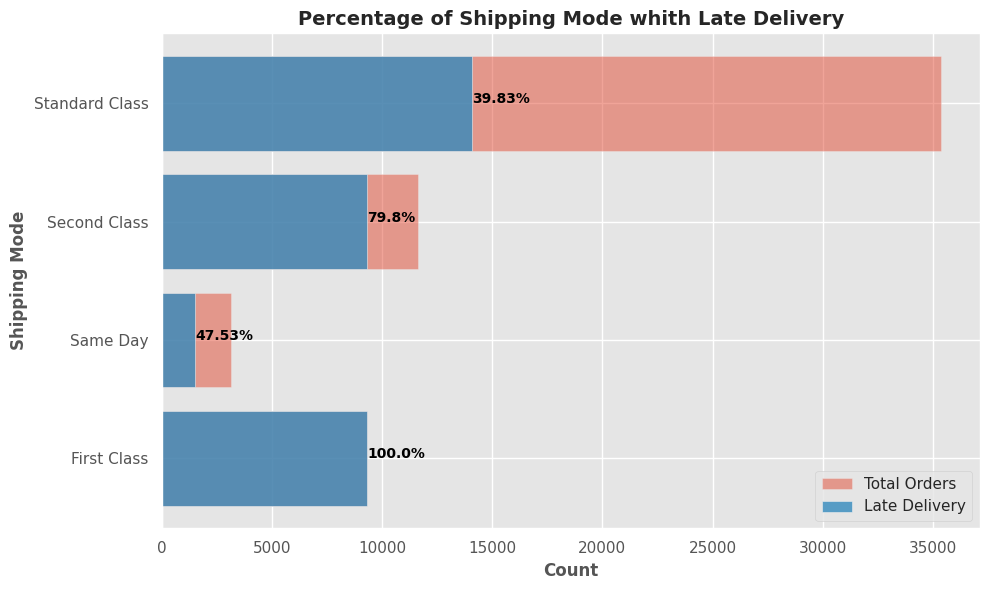

In [24]:
#Counts of Region of complete order
total_complete_counts_mode = df_complete_order.groupby('Shipping Mode')['Customer Id'].count()

#Counts of Region whith late delivery
mode_counts = df_complete_order_and_late.groupby('Shipping Mode')['Customer Id'].count()

mode_late_delivery_pct = mode_counts / total_complete_counts_mode * 100


# set figure size
plt.figure(figsize=(10,6))

# plot a horizontal bar chart
plt.barh(total_complete_counts_mode.index, total_complete_counts_mode, alpha=0.5, label='Total Orders')
plt.barh(mode_counts.index, mode_counts, alpha=0.8, label='Late Delivery')
plt.style.use('ggplot')
plt.title('Percentage of Shipping Mode whith Late Delivery', fontsize=14, fontweight='bold', loc='center')
plt.xlabel('Count',fontweight='bold')
plt.ylabel('Shipping Mode',fontweight='bold')

#add legend
plt.legend()

# add text labels for each bar
for i, v in enumerate(mode_counts):
    plt.text(v + 10, i, str(round(mode_late_delivery_pct[i], 2)) + '%', color='black', fontweight='bold')

plt.tight_layout()
plt.savefig('./output/Percentage of Shipping Mode with Late Delivery.png', format='png', dpi=300)
plt.show()


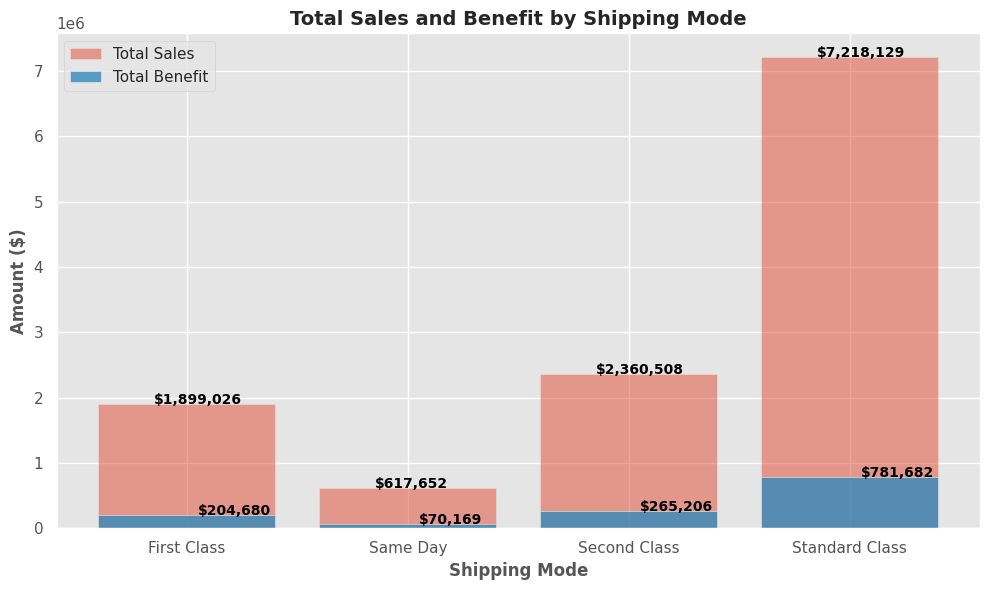

In [23]:
# Calculate total sales and benefit by shipping mode
sales_by_mode = df_complete_order.groupby('Shipping Mode')['Sales'].sum()
benefit_by_mode = df_complete_order.groupby('Shipping Mode')['Benefit per order'].sum()

# Set figure size
plt.figure(figsize=(10,6))

# Plot total sales and benefit by shipping mode
plt.bar(sales_by_mode.index, sales_by_mode, alpha=0.5, label='Total Sales')
plt.bar(benefit_by_mode.index, benefit_by_mode, alpha=0.8, label='Total Benefit')
plt.style.use('ggplot')
plt.title('Total Sales and Benefit by Shipping Mode', fontsize=14, fontweight='bold', loc='center')
plt.xlabel('Shipping Mode',fontweight='bold')
plt.ylabel('Amount ($)',fontweight='bold')

# Add legend
plt.legend()

# Add text labels for each bar
for i, v in enumerate(sales_by_mode):
    plt.text(i - 0.15, v + 1000, '${:,.0f}'.format(v), color='black', fontweight='bold')
    
for i, v in enumerate(benefit_by_mode):
    plt.text(i + 0.05, v + 1000, '${:,.0f}'.format(v), color='black', fontweight='bold')

plt.tight_layout()
plt.savefig('./output/Total Sales and Benefit by Shipping Mode.png', format='png', dpi=300)
plt.show()


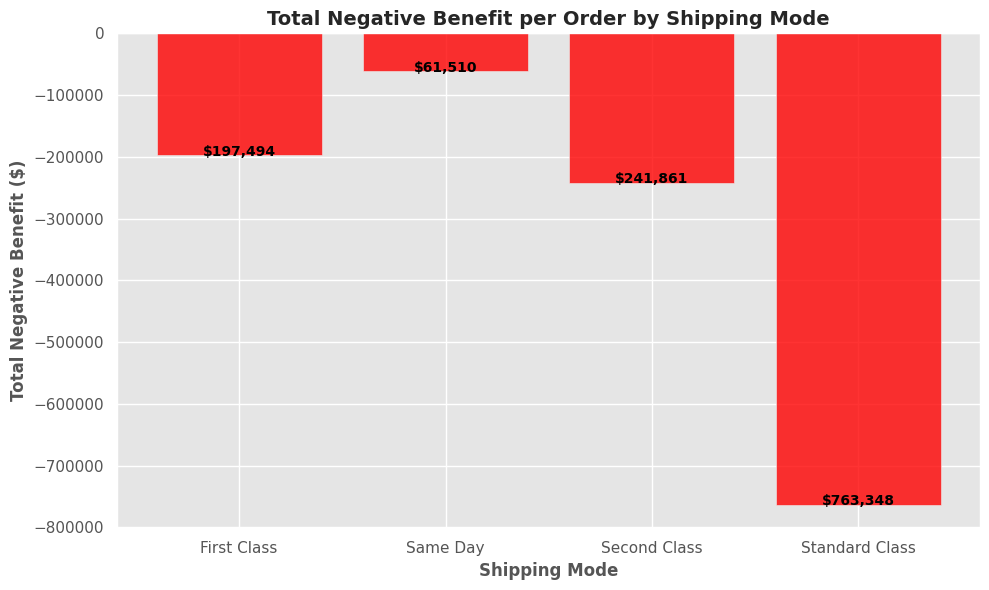

In [30]:
# filter the data for negative benefit per order
negative_benefit_df = df_complete_order[df_complete_order['Benefit per order'] < 0]

# group the data by shipping mode and calculate the total benefit and total sales
benefit_by_mode = negative_benefit_df.groupby('Shipping Mode')['Benefit per order'].sum()
sales_by_mode = df_complete_order.groupby('Shipping Mode')['Sales'].sum()

# create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(benefit_by_mode.index, benefit_by_mode.values, color='red', alpha=0.8)

# add labels and title
plt.title('Total Negative Benefit per Order by Shipping Mode', fontsize=14, fontweight='bold', loc='center')
plt.xlabel('Shipping Mode', fontweight='bold')
plt.ylabel('Total Negative Benefit ($)', fontweight='bold')

# add dollar amount and percentage labels for each bar
for i, v in enumerate(benefit_by_mode.values):
    plt.text(i, v-500, '${:,.0f}'.format(abs(v)), color='black', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


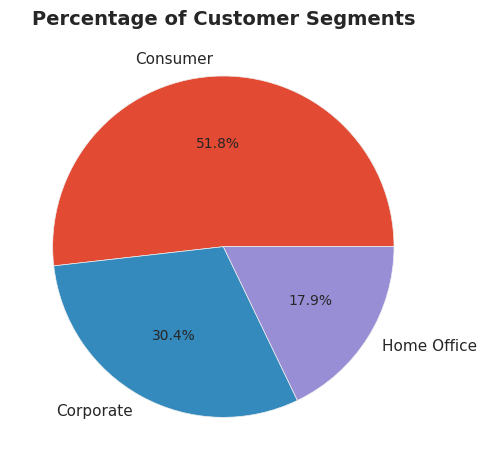

In [92]:
#Percentage of customers segments
segment_counts = df.groupby('Customer Segment')['Customer Id'].count()

# plot a pie chart
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%')
plt.style.use('ggplot')
plt.title('Percentage of Customer Segments', fontsize=14, fontweight='bold', loc='center')
plt.tight_layout()
plt.savefig('./output/Percentage of customers segments.png', format='png', dpi=300)
plt.show()


# Phase 2: Data Analysis
In this phase, the data will be analyzed to identify patterns and trends. Statistical techniques will be used to identify areas of improvement in the supply chain management process. Key performance indicators (KPIs) will be identified to measure the success of the optimization process.

## Delivery Performance

### Objective:
   - Understand the overall delivery performance of your supply chain.
   - Identify any bottlenecks or issues that may be affecting delivery timelines.
   - Determine the on-time delivery rate and late delivery percentage.
   
The formula for calculating the on-time delivery rate is as follows:

On-Time Delivery Rate = (Number of Orders Delivered on Time / Total Number of Orders) * 100

To calculate the on-time delivery rate, we need to determine the number of orders that were delivered on time and divide it by the total number of orders. Multiply the result by 100 to express it as a percentage.

### Select relevant columns:
   - Delivery Status: This column will provide information on the status of orders, such as advance shipping, late delivery, shipping canceled, or shipping on time.
   - Late_delivery_risk: This categorical variable indicates if a delivery is late (1) or not late (0).
   - Order Region: This column identifies the region of the world where the order is delivered.
   - Order State: This column specifies the state of the region where the order is delivered.
   - Order City: This column contains the destination city of the order.
   - Days for shipping (real): This column provides the actual shipping days of the purchased product.
   - Days for shipment (scheduled): This column includes the scheduled delivery days of the purchased product.



In [50]:
df_delivery=df[['Delivery Status', 'Late_delivery_risk', 'Order Region', 'Order State', 'Order City', 'Days for shipping (real)', 'Days for shipment (scheduled)']]
df_delivery.head()

,Delivery Status,Late_delivery_risk,Order Region,Order State,Order City,Days for shipping (real),Days for shipment (scheduled)
0,Advance shipping,False,Southeast Asia,Java Occidental,Bekasi,3,4
1,Late delivery,True,South Asia,Rajastán,Bikaner,5,4
2,Shipping on time,False,South Asia,Rajastán,Bikaner,4,4
3,Advance shipping,False,Oceania,Queensland,Townsville,3,4
4,Advance shipping,False,Oceania,Queensland,Townsville,2,4


### Calculate key delivery performance metrics:
   - Calculate the on-time delivery rate by dividing the number of orders delivered on time by the total number of orders.
   - Calculate the late delivery percentage by dividing the number of late deliveries by the total number of orders.
   - Analyze the distribution of delivery statuses, such as the number of orders with advance shipping, late delivery, or shipping cancellations.

In [59]:
df_delivery['Delivery Status'].value_counts()

Delivery Status
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: count, dtype: int64

In [53]:
#On-Time Delivery Rate = (Number of Orders Delivered on Time / Total Number of Orders) * 100
mask= (df_delivery["Delivery Status"] == "Shipping on time") | (df_delivery["Delivery Status"] == "Advance shipping")
OTD= 100*len(df_delivery[mask])/len(df_delivery)
print(OTD)

40.87547571169794


In [58]:
#Late Shipment Rate = (Number of Orders Delivered Late / Total Number of Orders) * 100
LSR = 100*len(df_delivery[df_delivery["Delivery Status"] == "Late delivery"])/len(df_delivery)
print(LSR)

54.829131559558824


In [60]:
#Order Cancellation Rate = (Number of Orders Canceled / Total Number of Orders) * 100)
OCR = 100*len(df_delivery[df_delivery["Delivery Status"] == "Shipping canceled"])/len(df_delivery)
print(OCR)

4.295392728743235


### Visualize the delivery performance:
   - Create a bar chart or pie chart to illustrate the distribution of delivery statuses.
   - Generate a line chart or stacked bar chart to visualize the on-time delivery rate and track its trend over time.
   - Use maps or geographical plots to show the delivery performance by region or state.

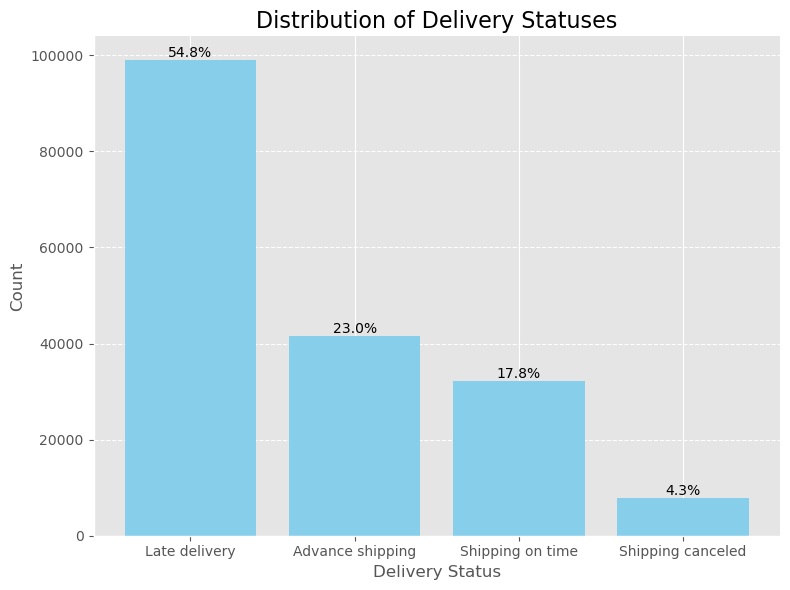

In [64]:
# Count the occurrences of each delivery status
status_counts = df_delivery['Delivery Status'].value_counts()

# Calculate the percentage for each status
total_statuses = len(df_delivery)
status_percentages = status_counts / total_statuses * 100

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Create a bar chart
bars = ax.bar(status_counts.index, status_counts.values, color='skyblue')

# Set the chart title and labels
ax.set_title('Distribution of Delivery Statuses', fontsize=16)
ax.set_xlabel('Delivery Status', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Add gridlines
ax.grid(axis='y', linestyle='--')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add percentage labels on each bar
for bar in bars:
    height = bar.get_height()
    percentage = f'{height / total_statuses * 100:.1f}%'
    ax.text(bar.get_x() + bar.get_width() / 2, height, percentage,
            ha='center', va='bottom', fontsize=10)

# Adjust the layout and spacing
fig.tight_layout()

# Display the chart
plt.show()


6. Analyze the insights:
   - Identify regions or states with high late delivery rates.
   - Explore the reasons behind late deliveries, such as logistical issues, inventory problems, or transportation challenges.
   - Evaluate the impact of delivery performance on customer satisfaction and overall business operations.
   - Generate recommendations for improving delivery performance, such as optimizing logistics routes, enhancing inventory management, or implementing better tracking systems.

7. Document your findings:
   - Summarize the key insights and observations from the delivery performance analysis.
   - Document any recommendations or action points for improving delivery efficiency and reducing late deliveries.
   - Capture relevant charts, graphs, or visualizations to support your analysis.

Remember to take notes, document your steps, and save your analysis for future reference.